In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,country,year,inflationrate,GDP_In_Billion_USD
0,India,1980,0.11,186.33
1,India,1981,0.13,193.49
2,India,1982,0.08,200.72
3,India,1983,0.12,218.26
4,India,1984,0.08,212.16


In [4]:
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             41 non-null     object 
 1   year                41 non-null     int64  
 2   inflationrate       41 non-null     float64
 3   GDP_In_Billion_USD  41 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.4+ KB


In [6]:
df = df.sort_values(by='year')
df = df.reset_index(drop=True)
df.head()

,country,year,inflationrate,GDP_In_Billion_USD
0,India,1980,0.11,186.33
1,India,1981,0.13,193.49
2,India,1982,0.08,200.72
3,India,1983,0.12,218.26
4,India,1984,0.08,212.16


Text(0, 0.5, 'inflationrate')

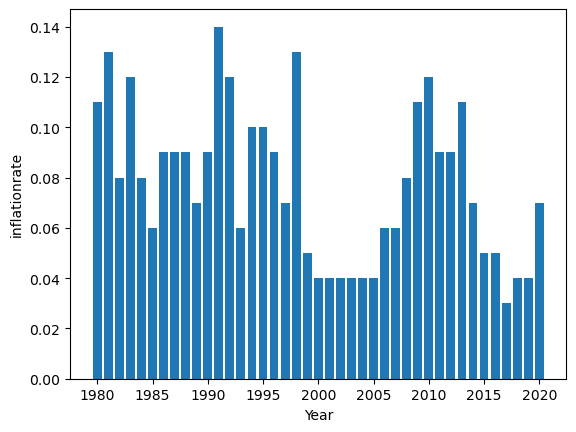

In [7]:
plt.bar(df['year'],df['inflationrate'])
plt.xlabel("Year")
plt.ylabel("inflationrate")
#plt.xticks(rotation=45)
#plt.savefig("img2.jpg")

Text(0, 0.5, 'GDP_In_Billion_USD')

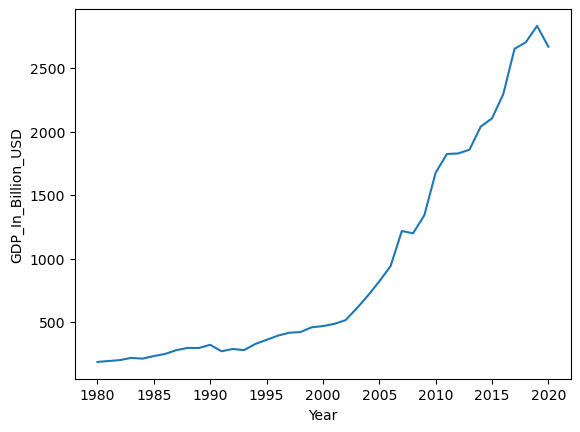

In [8]:
plt.plot(df.year,df.GDP_In_Billion_USD)
plt.xlabel("Year")
plt.ylabel("GDP_In_Billion_USD")
#plt.xticks(rotation=80)
#plt.savefig("img1.jpg")


Normalisation


In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn.linear_model import LinearRegression

In [10]:
df.head()

,country,year,inflationrate,GDP_In_Billion_USD
0,India,1980,0.11,186.33
1,India,1981,0.13,193.49
2,India,1982,0.08,200.72
3,India,1983,0.12,218.26
4,India,1984,0.08,212.16


In [11]:
lr = LinearRegression()
X = df[['year']]
Y = df[['inflationrate']]
model = lr.fit(X, Y)

In [12]:
Pred_X = pd.DataFrame(list(range(1980,2023)),columns=['year'])
Pred_X['Prediction'] = model.predict(Pred_X[['year']])

(array([1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

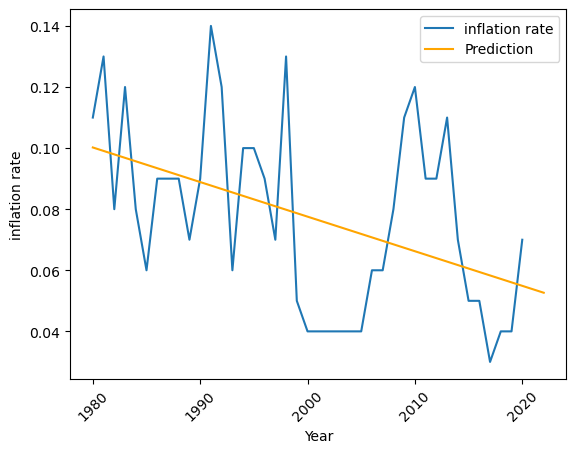

In [13]:
plt.plot(df.year,df.inflationrate,label = "inflation rate")
plt.plot(Pred_X.year,Pred_X.Prediction, label = "Prediction",color='orange')
plt.legend()
plt.xlabel("Year")
plt.ylabel("inflation rate")
plt.xticks(rotation=45)
#plt.savefig("img3.jpg")

In [14]:
compare_y_ypred = pd.DataFrame()
compare_y_ypred['Input'] = Y.values.flatten()[0:41]
compare_y_ypred["ModelPrediction"] = Pred_X['Prediction'].values.flatten()[0:41]

In [15]:
compare_y_ypred.to_csv('linearRegression.csv', index=False)

Polynomial Regression


In [16]:
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, Y)
lin = LinearRegression()
lin.fit(X_poly, Y)

LinearRegression()

Text(0, 0.5, 'inflationrate')

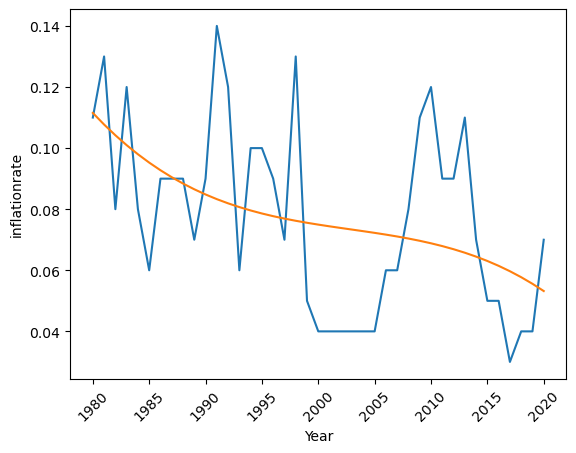

In [17]:
plt.plot(X, Y)
plt.plot(X[0:41], lin.predict(poly.fit_transform(X[0:41])))
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("inflationrate")

#plt.savefig("img4.jpg")


In [21]:
compare_y_ypred = pd.DataFrame()
compare_y_ypred['Input'] = Y.values.flatten()[0:41]
compare_y_ypred["ModelPrediction"] = lin.predict(poly.fit_transform(X))[0:41]

In [22]:
compare_y_ypred.head(40)
compare_y_ypred.to_csv('polynomial.csv', index=False)

Prediction


In [23]:
pred=lin.predict(poly.fit_transform(pd.DataFrame(list(range(2022,2043)))))
df1=pd.DataFrame(list(range(2022,2043)),columns=['Year'])
df1["pred"]=pred
df1


,Year,pred
0,2022,0.05
1,2023,0.04
2,2024,0.04
3,2025,0.04
4,2026,0.03
5,2027,0.03
6,2028,0.02
7,2029,0.02
8,2030,0.01
9,2031,0.01
